(0, 0, 566, 315)


(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

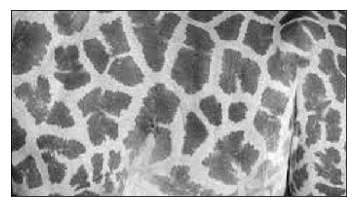

In [8]:
#creating a colormap
from matplotlib.colors import LinearSegmentedColormap
cdict = {'red':   ((0.0, 0.0, 0.0),
                   (0.1, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

        'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
red = LinearSegmentedColormap('Red', cdict)

#cropping the image
import matplotlib.pyplot as plt
from PIL import Image
import cv2
im = Image.open('giraffe.png');
width, height=im.size
area = (0,0,width, height )
print(area)
im2 = im.crop(area)
im2.save('giraffe.tif')
img = cv2.imread('giraffe.tif',0)
#im2.show()
plt.imshow(img, cmap='gray' )
plt.xticks([]), plt.yticks([])

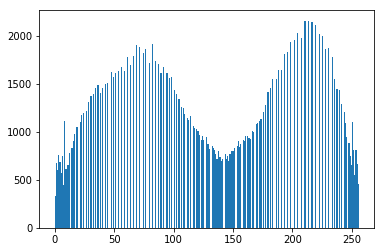

In [28]:
#plotting the equalized histogram

equ = cv2.equalizeHist(img)
plt.hist(equ.ravel(),256,[0,256])
plt.show()
#if you don't say plt.show() then it prints the array


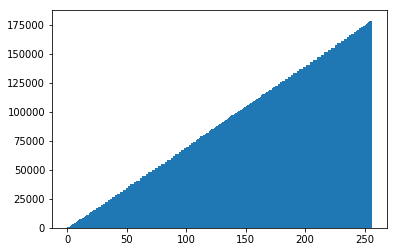

In [30]:

equ = cv2.equalizeHist(img)
plt.hist(equ.ravel(),256,[0,256], cumulative='true')
plt.show()
#if you don't say plt.show() then it prints the array


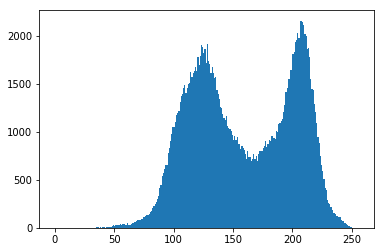

In [10]:
plt.hist(img.ravel(),256,[0,256])
plt.show()

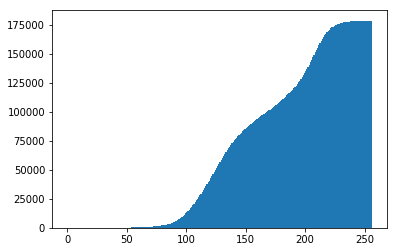

In [31]:
plt.hist(img.ravel(),256,[0,256], cumulative='true')
plt.show()

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

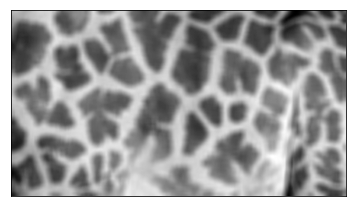

In [11]:
#blurring the original image
fblur= cv2.blur(img,(12, 12))
plt.imshow(fblur, cmap='gray', interpolation= 'sinc')
plt.xticks([]), plt.yticks([])

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

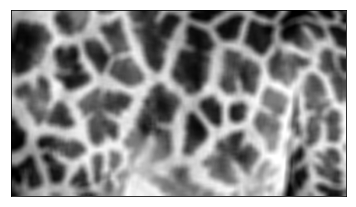

In [12]:
#blurring 
ablur = cv2.blur(equ,(12, 12))
plt.imshow(ablur, cmap='gray', interpolation='sinc')
plt.xticks([]), plt.yticks([])

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

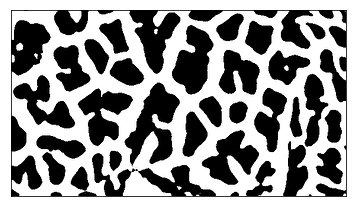

In [13]:
#thresholding using average blur and mean threshold
a_mthres = cv2.adaptiveThreshold(ablur,1,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,49,4) 
plt.imshow(a_mthres, cmap='gray', interpolation='sinc')
plt.xticks([]), plt.yticks([])

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

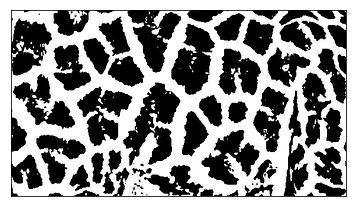

In [19]:
#thresholding original image
th = cv2.adaptiveThreshold(img,1,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,49,4) 
plt.imshow(th, cmap='gray', interpolation='sinc')
plt.xticks([]), plt.yticks([])

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

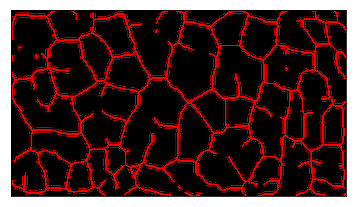

In [14]:
#skeletonizing 
from skimage.morphology import skeletonize, remove_small_objects
adaptiveskeleton = skeletonize(a_mthres)
plt.imshow(adaptiveskeleton, cmap=red, interpolation='sinc') 
plt.xticks([]), plt.yticks([])

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

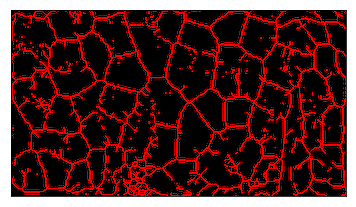

In [21]:
#skeletonizing original image?
from skimage.morphology import skeletonize, remove_small_objects
sk = skeletonize(th)
plt.imshow(sk, cmap=red, interpolation='sinc') 
plt.xticks([]), plt.yticks([])

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

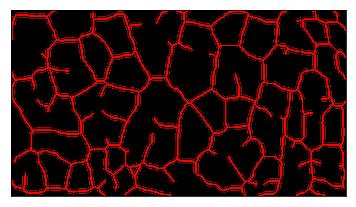

In [23]:
#cleaning skeleton
cleanskel=remove_small_objects(adaptiveskeleton, min_size=70, connectivity=3)
plt.imshow(cleanskel, cmap=red, interpolation='sinc') 
plt.xticks([]), plt.yticks([])

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

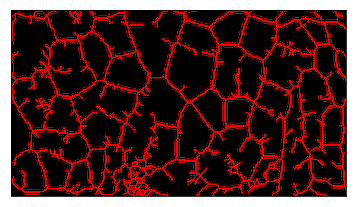

In [24]:
#cleaning skeleton for figure
csk=remove_small_objects(sk, min_size=70, connectivity=3)
plt.imshow(csk, cmap=red, interpolation='sinc') 
plt.xticks([]), plt.yticks([])

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

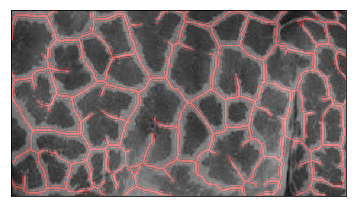

In [16]:
#overlaying the skeleton and original image
plt.imshow(img, cmap='gray', alpha= .9)
plt.imshow(cleanskel, cmap=red, interpolation='sinc', alpha=0.4) 
plt.xticks([]), plt.yticks([])

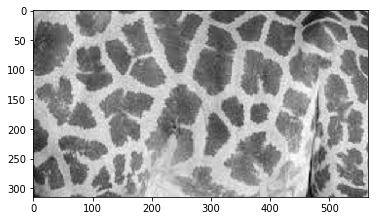

In [17]:
plt.imshow(img, cmap='gray')

In [18]:
#https://www.mathworks.com/help/matlab/ref/colormap.html
#copper cmap is kind of realistic